In [2]:
import numpy as np
import pandas as pd
from sklearn import model_selection as ms
from sklearn import feature_extraction as fe
from modules.data_extractor import extractor
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA


In [3]:
((trX, trY),(teX, teY)) = extractor(file='data/emails.csv').get()

In [4]:
trX = trX.A
trY = trY.values


In [55]:
set_1 = np.take(trX,np.array([i for i in range(len(trY)) if trY[i] == 0]),axis=0)
set_2 = np.take(trX,np.array([i for i in range(len(trY)) if trY[i] == 1]),axis=0)

HAM = np.sum(set_1,axis=0)
SPAM = (-1)*np.sum(set_2,axis=0)
#DIFF = HAM-SPAM
sort_idicies = np.argsort((-1)*HAM)
HAM  = np.take(HAM,sort_idicies,axis=0)
SPAM = np.take(SPAM,sort_idicies,axis=0)



<BarContainer object of 33485 artists>

<Figure size 432x288 with 0 Axes>

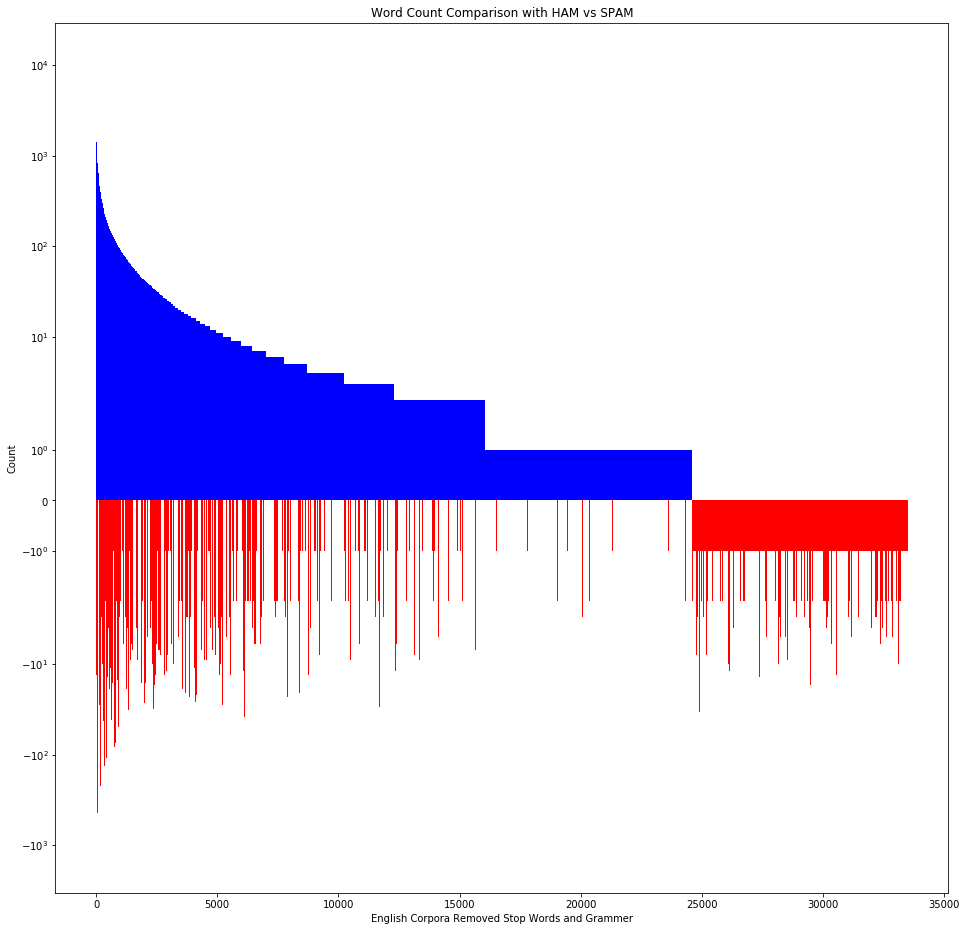

In [ ]:
x = np.arange(HAM.shape[0])
fig = plt.figure()
plt.figure(figsize=(16,16))
plt.title("Word Count Comparison with HAM vs SPAM")
plt.xlabel("English Corpora Removed Stop Words and Grammer")
plt.ylabel("Count")
plt.yscale('symlog')
plt.bar(x, SPAM, width=1, color='r')
plt.bar(x, HAM, width=1, color='b')
